In [243]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
from pandas.plotting import register_matplotlib_converters
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
register_matplotlib_converters()
from time import time
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf, month_plot, quarter_plot

# ICE Data

In [244]:
def parser(s):
    return datetime.strptime(s, '%Y-%m-%d')

In [245]:
df=pd.read_csv("C:\\Users\\Ahmed\\Downloads\\ice_cream.csv")

In [246]:
df

,DATE,IPN31152N
0,1972-01-01,59.9622
1,1972-02-01,67.0605
2,1972-03-01,74.2350
3,1972-04-01,78.1120
4,1972-05-01,84.7636
...,...,...
572,2019-09-01,100.1741
573,2019-10-01,90.1684
574,2019-11-01,79.7223
575,2019-12-01,75.7094


In [247]:
#read data
df = pd.read_csv('C:\\Users\\Ahmed\\Downloads\\ice_cream.csv', parse_dates=[0], index_col=0, date_parser=parser)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_27708\3250832622.py:2: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('C:\\Users\\Ahmed\\Downloads\\ice_cream.csv', parse_dates=[0], index_col=0, date_parser=parser)


In [248]:
#infer the frequency of the data
df = df.asfreq(pd.infer_freq(df.index))
df.head(20)

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
1972-06-01,100.5960
1972-07-01,100.1263
1972-08-01,96.3607
1972-09-01,85.8007


# Identifing if it is Stationary or Non_S

## Plots

In [29]:
start_date = datetime(1972,1,1)
end_date = datetime(2020,1,1)
lim_df = df[start_date:end_date]

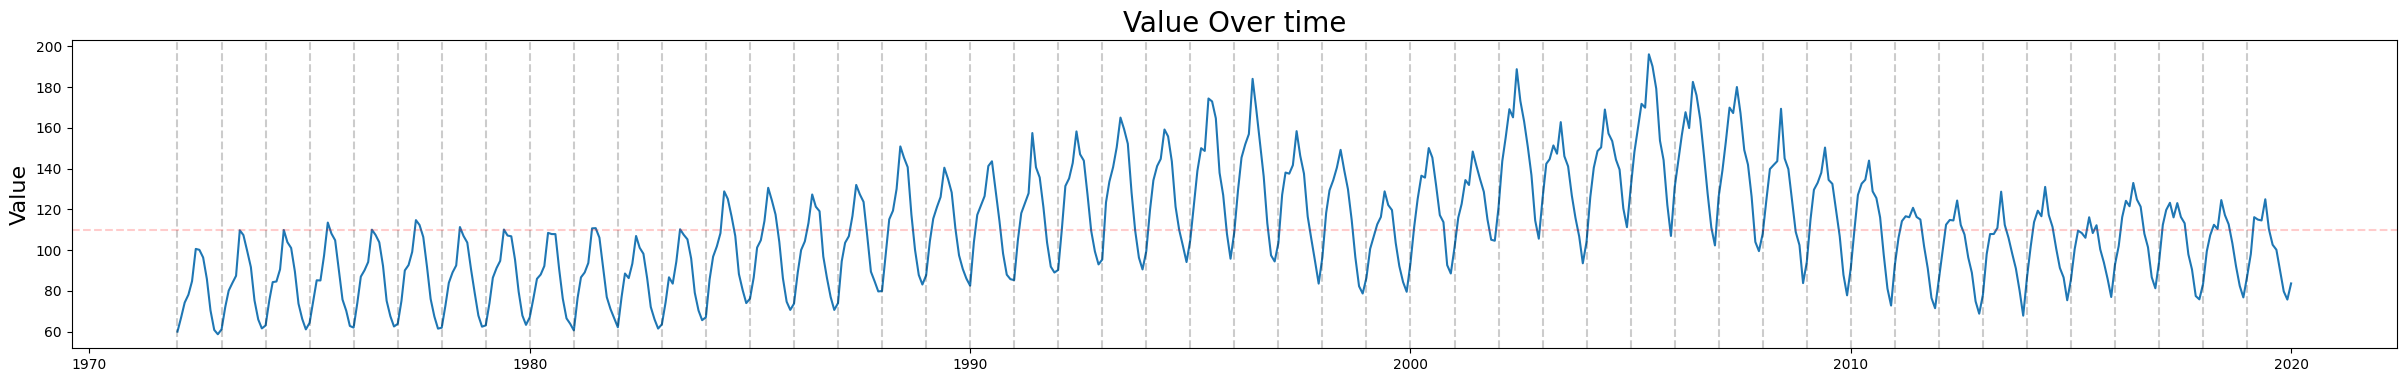

In [30]:
plt.figure(figsize=(30,4))
plt.plot(lim_df)
plt.title('Value Over time', fontsize=20)
plt.ylabel('Value', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(lim_df['IPN31152N'].mean(), color='r', alpha=0.2, linestyle='--')

In [ ]:
####################### Observation from the graph by look ############################

#### No const Mean               bad
#### NO const Vairance           bad
#### No Const Autocorrelation   good  ->> look at the mean 
#### No Periodic component      good

## Summary Statistics 

### Checking Mean and Variance

In [36]:
rolling_mean = df.rolling(window=12).mean()
rolling_std = df.rolling(window=12).std()

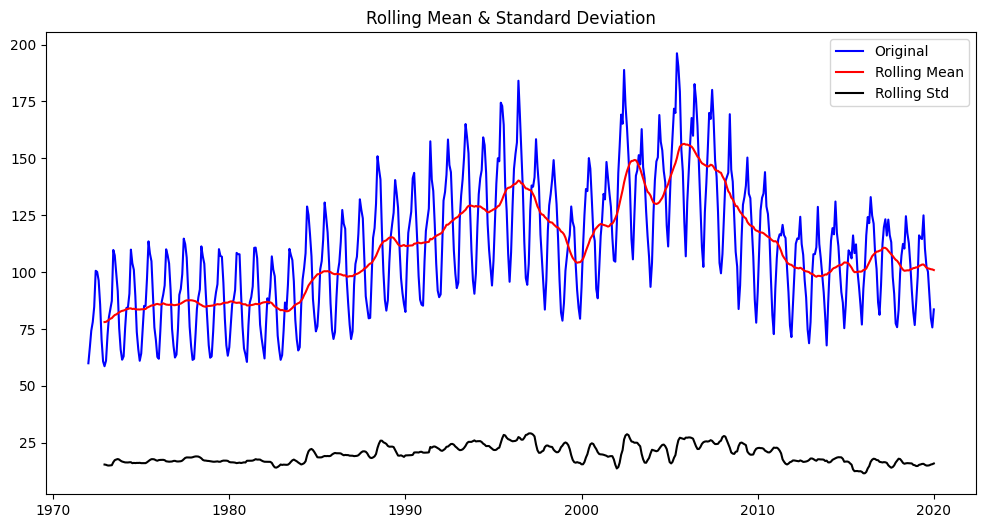

In [37]:
plt.figure(figsize=(12, 6))
plt.plot(df, color='blue', label='Original')
plt.plot(rolling_mean, color='red', label='Rolling Mean')
plt.plot(rolling_std, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show()

In [ ]:
################## Correction for the prev observation #########################

#### NO const Vairance       bad   (corrected to)------->   const Vairance       good

### ADF test 

In [ ]:
# the H0 is the data Non_stationary 
# the H1 is the data stationary 

In [ ]:
# ADF Test: A p-value less than 0.05 typically indicates the time series is stationary 
# (rejecting the null hypothesis).

In [38]:
adf_test = sm.tsa.adfuller(df)
print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])

ADF Statistic: -1.758009
p-value: 0.401499


In [ ]:
# NON_Statinary

### KPSS test

In [ ]:
# the H0 is the data stationary 
# the H1 is the data Non_stationary 

In [ ]:
# KPSS Test: A p-value greater than 0.05 indicates the time series is stationary 
# (failing to reject the null hypothesis).

In [39]:
kpss_test = sm.tsa.kpss(df)
print('KPSS Statistic: %f' % kpss_test[0])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 1.699579
p-value: 0.010000


C:\Users\Ahmed\AppData\Local\Temp\ipykernel_27708\592107588.py:1: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  kpss_test = sm.tsa.kpss(df)


### Stationary or not ?

In [40]:
# NON_Stationary 

# Solve Non_Stationary

In [ ]:
# - Remove trend (constant mean)   ->>> No constant Trend 
# - Remove heteroscedasticity with log (constant variance) ->>> already const Variance
# - Remove autocorrelation with differencing (exploit constant structure) ->>> Will Try this 
# - Remove seasonality (no periodic component)  ->>> already No periodic
# - Multiple transformations are often required.

## Differencing 

In [42]:
first_diff = lim_df.diff()[1:]
first_diff.head(20)

,IPN31152N
DATE,
1972-02-01,7.0983
1972-03-01,7.1745
1972-04-01,3.8770
1972-05-01,6.6516
1972-06-01,15.8324
1972-07-01,-0.4697
1972-08-01,-3.7656
1972-09-01,-10.5600
1972-10-01,-15.4073


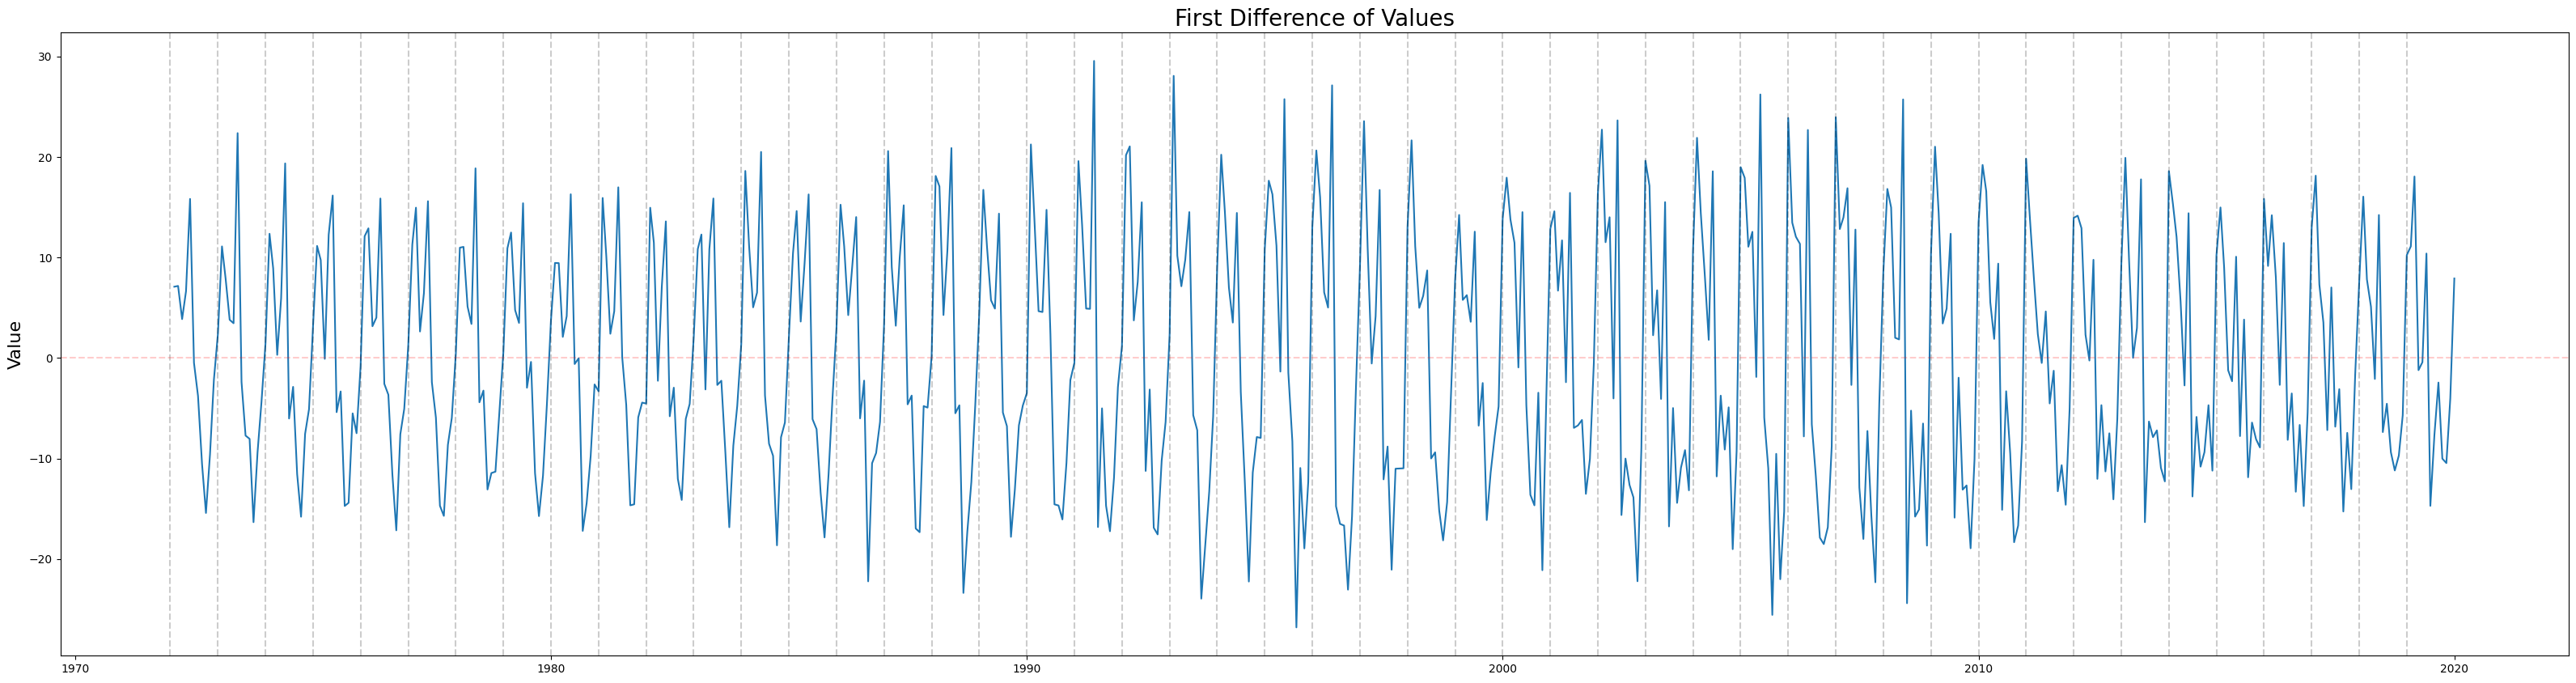

In [47]:
plt.figure(figsize=(40,10))
plt.plot(first_diff)
plt.title('First Difference of Values', fontsize=20)
plt.ylabel('Value', fontsize=16)
for year in range(start_date.year,end_date.year):
    plt.axvline(pd.to_datetime(str(year)+'-01-01'), color='k', linestyle='--', alpha=0.2)
plt.axhline(first_diff['IPN31152N'].mean(), color='r', alpha=0.2, linestyle='--')

In [ ]:
##### const Mean 
##### const variance 
##### const autocorrelation 
##### No periodic 



# Try the tests again 

In [48]:
adf_test = sm.tsa.adfuller(first_diff)
kpss_test = sm.tsa.kpss(first_diff)

C:\Users\Ahmed\AppData\Local\Temp\ipykernel_27708\1517838418.py:2: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  kpss_test = sm.tsa.kpss(first_diff)


In [51]:
if adf_test[1] < 0.05 and kpss_test[1] > 0.05 :
    print('Stationary')
else:
    print('Non_Stationary')

Stationary


# ACF

In [11]:
acf_vals = acf(first_diff)

In [12]:
num_lags = 10

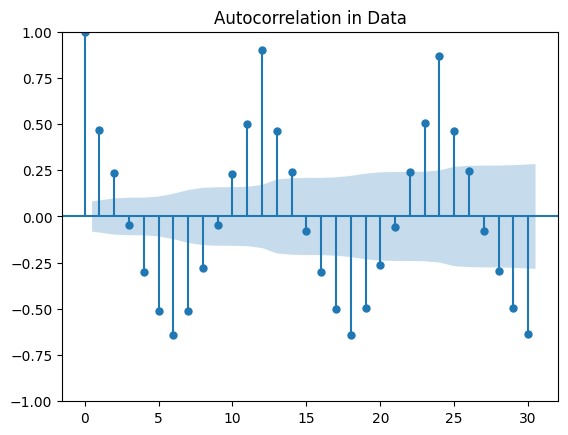

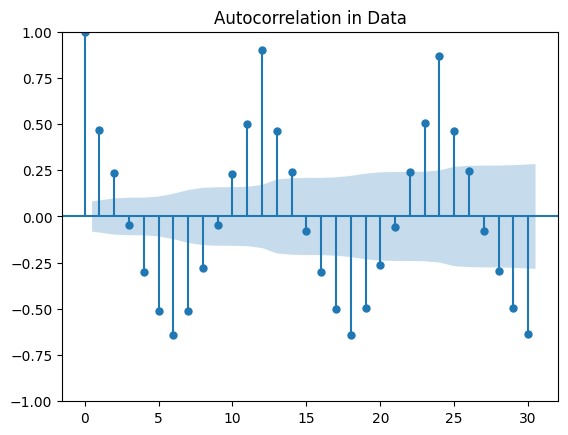

In [52]:
plot_acf(first_diff, lags=30, title='Autocorrelation in Data')

## Based on ACF, we should start with a MA(12) process

# PACF

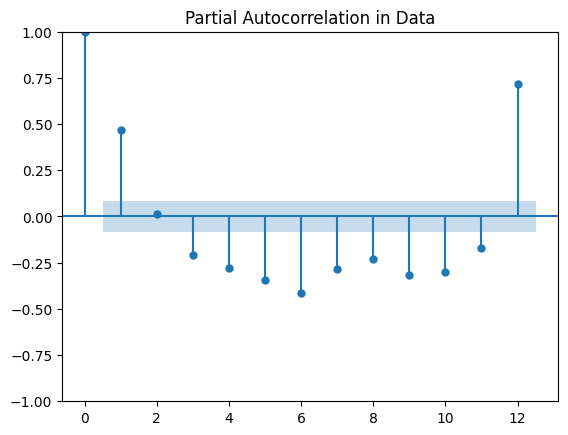

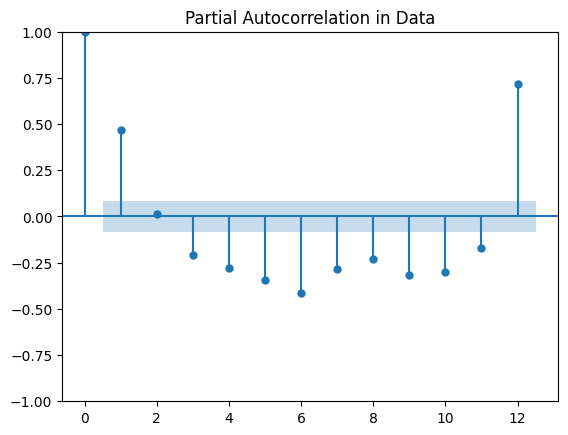

In [53]:
plot_pacf(first_diff, lags=12, title='Partial Autocorrelation in Data')

## Based on PACF, we should start with a AR(12) process

# Get training and testing sets

In [239]:
train_end = datetime(2008,12,1)
test_end = datetime(2020,12,1)

train_data = first_diff[:train_end]
test_data = first_diff[datetime(2009,1,1):test_end]

# Fit the ARMA Model

In [109]:
# define model
model = ARIMA(train_data, order=(30,0,12))

In [110]:
#fit the model
model_fit = model.fit()

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [111]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [112]:
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['IPN31152N'] - predictions

In [113]:
residuals

DATE
2009-01-01   -10.126340
2009-02-01    -0.277234
2009-03-01     0.950176
2009-04-01    -4.923167
2009-05-01     2.237629
                ...    
2019-09-01    12.736213
2019-10-01     3.359011
2019-11-01     1.855860
2019-12-01     2.254105
2020-01-01    -8.094118
Freq: MS, Length: 133, dtype: float64

#### with q=12 , p=12

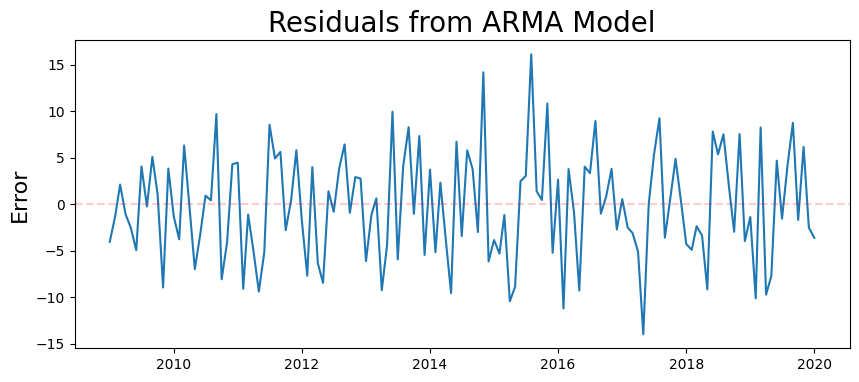

In [96]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

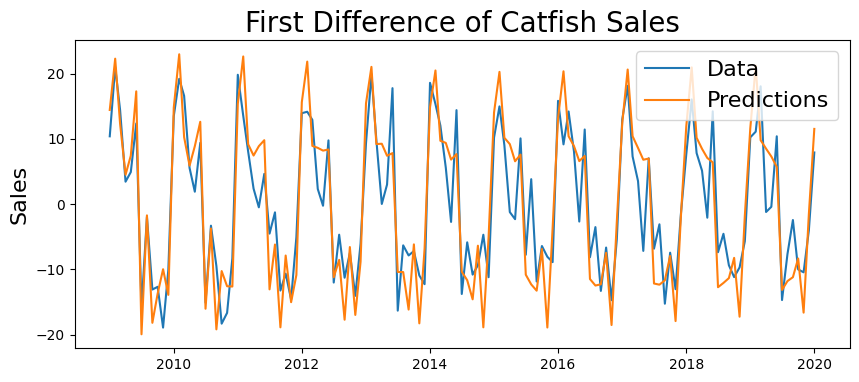

In [97]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Ice Data', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [98]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 5.766272672929945


#### with q=6 , p=6

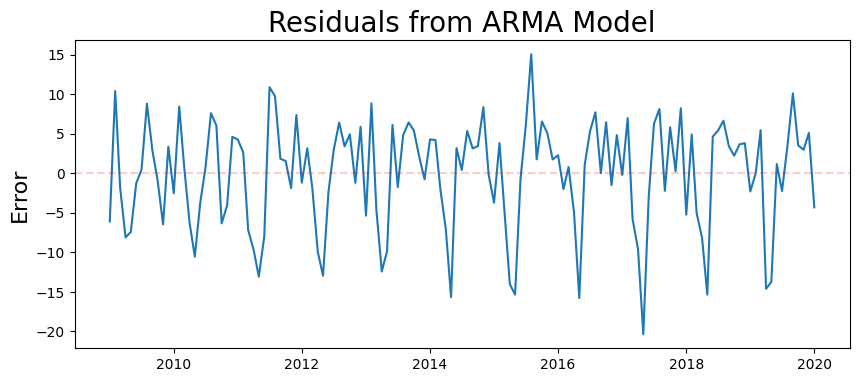

In [104]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

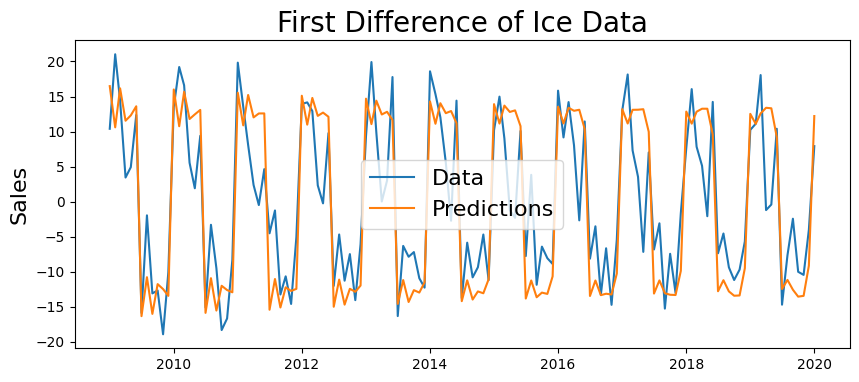

In [107]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Ice Data', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [108]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 6.781011672157433


#### with 30 & 12 

<Figure size 1000x400 with 0 Axes>

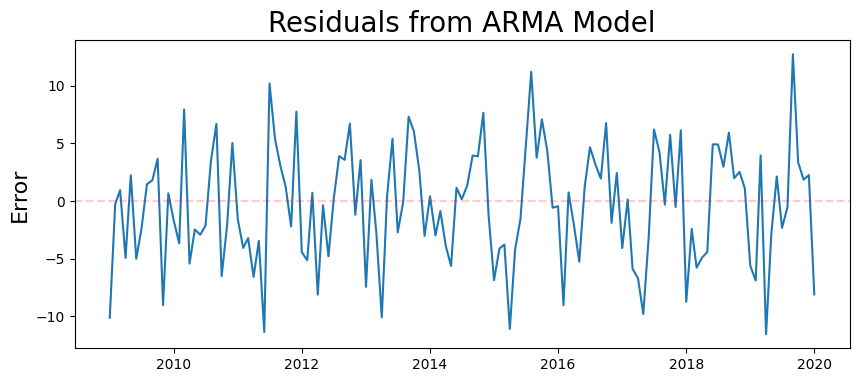

<Figure size 1000x400 with 0 Axes>

In [114]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)
plt.figure(figsize=(10,4))

Text(0, 0.5, 'Sales')

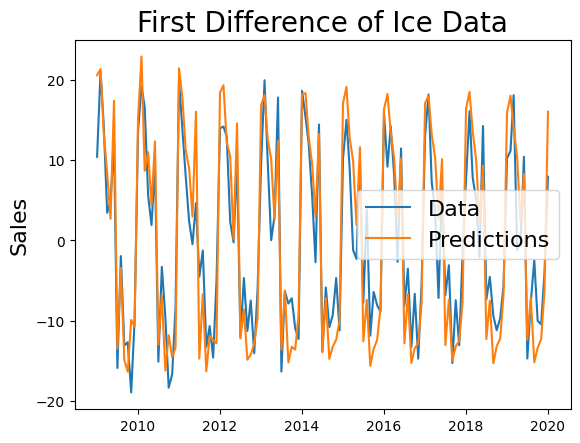

In [115]:
plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Ice Data', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [116]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 5.039041286292776


### the best parameters are 12 , 12 

# With out Solving the Non_Stationary Problem

# Use ARIMA with the I (Integrated) part -> 
#### represents the number of differencing steps applied

### I=1

In [249]:
train_end = datetime(2008,12,1)
test_end = datetime(2020,12,1)

train_data = df[:train_end]
test_data = df[datetime(2009,1,1):test_end]

In [118]:
# define model
model = ARIMA(train_data, order=(12,1,12))
#fit the model
model_fit = model.fit()

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [119]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['IPN31152N'] - predictions
residuals

DATE
2009-01-01    -4.494410
2009-02-01    -4.263567
2009-03-01    -4.171629
2009-04-01    -4.932359
2009-05-01    -6.036559
                ...    
2019-09-01   -13.973824
2019-10-01   -16.975462
2019-11-01   -12.612310
2019-12-01   -13.888513
2020-01-01   -16.482315
Freq: MS, Length: 133, dtype: float64

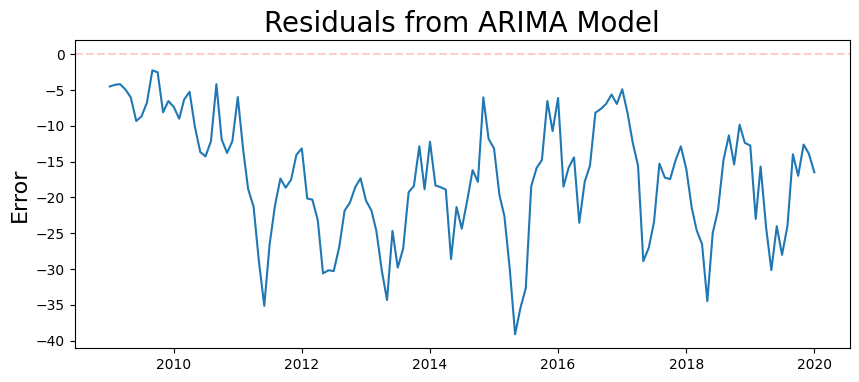

In [123]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

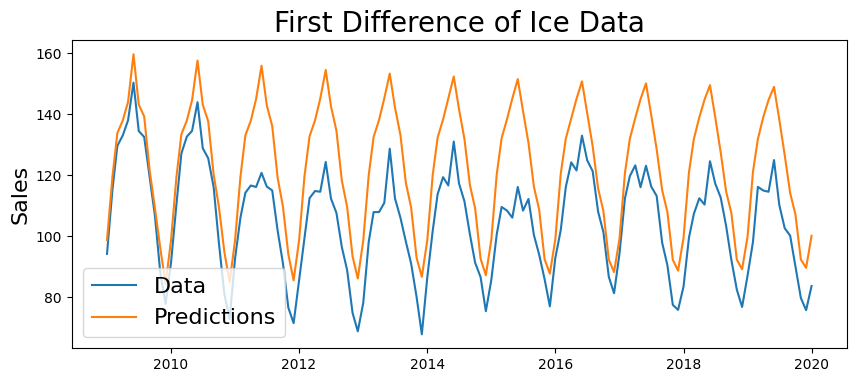

In [121]:
plt.figure(figsize=(10,4))

plt.plot(test_data)
plt.plot(predictions)

plt.legend(('Data', 'Predictions'), fontsize=16)

plt.title('First Difference of Ice Data', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [122]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 19.089255466746152


### I=2

In [134]:
model = ARIMA(train_data, order=(12,2,12))
#fit the model
model_fit = model.fit()

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [135]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['IPN31152N'] - predictions
residuals

DATE
2009-01-01    -6.420488
2009-02-01    -2.801086
2009-03-01    -4.588988
2009-04-01    -4.641640
2009-05-01    -6.568721
                ...    
2019-09-01     1.912883
2019-10-01     1.569320
2019-11-01    12.944992
2019-12-01    12.421728
2020-01-01    10.747898
Freq: MS, Length: 133, dtype: float64

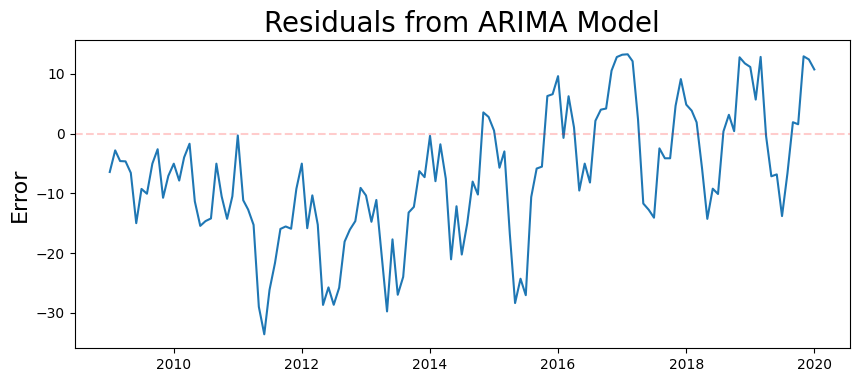

In [136]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

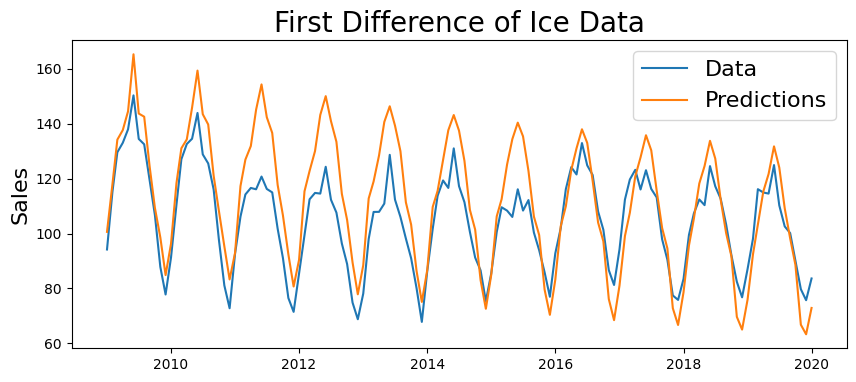

In [137]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('First Difference of Ice Data', fontsize=20)
plt.ylabel('Sales', fontsize=16)


In [138]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 13.069300314467572


# If was Seasonality problem

In [ ]:
# SARMA (Seasonal ARMA)
## SARMA(p, q)(P, Q, s) extends ARMA to account for seasonality. 
## The additional terms (P, Q) are for the seasonal autoregressive and moving average components,
## and s is the length of the seasonal cycle.

# If Variance Changes Proplem

In [ ]:
### GARCH (Generalized Autoregressive Conditional Heteroskedasticity)
# GARCH models are used for modeling time series data where volatility changes over time, 
# especially for financial time series. They are suitable for stationary data where the 
# variance changes over time.

# IF Seasonality and Trend Proplem

In [ ]:
### Exponential Smoothing (ETS)
# ETS models, particularly the Holt-Winters method, are used for data that 
# may exhibit trend and seasonality but can be adapted to stationary data by 
# focusing on smoothing.

# Try SARIMA

In [139]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [201]:
model = SARIMAX(train_data, order=(11, 0, 11), seasonal_order=(1, 0, 1, 12))
model_fit = model.fit()

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\statsmodels\tsa\statespace\sarimax.py:997: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [202]:
#get prediction start and end dates
pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]
#get the predictions and residuals
predictions = model_fit.predict(start=pred_start_date, end=pred_end_date)
residuals = test_data['IPN31152N'] - predictions
residuals

DATE
2009-01-01    -5.906428
2009-02-01    -3.997104
2009-03-01     1.019457
2009-04-01    -6.277413
2009-05-01     1.023233
                ...    
2019-09-01    29.728609
2019-10-01    29.543893
2019-11-01    30.508868
2019-12-01    35.390863
2020-01-01    31.687945
Freq: MS, Length: 133, dtype: float64

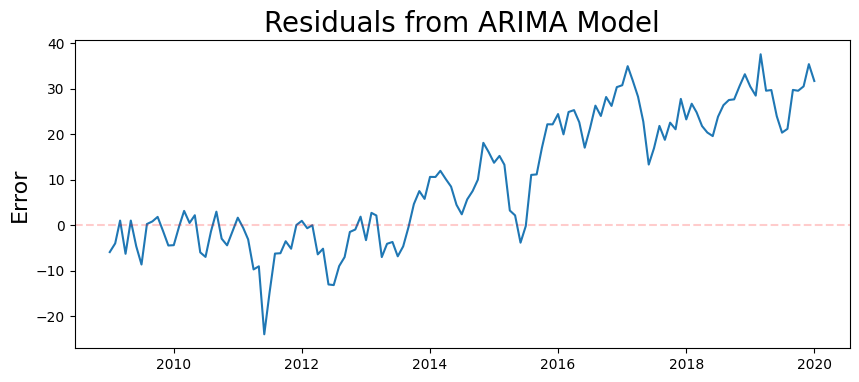

In [203]:
plt.figure(figsize=(10,4))
plt.plot(residuals)
plt.title('Residuals from ARIMA Model', fontsize=20)
plt.ylabel('Error', fontsize=16)
plt.axhline(0, color='r', linestyle='--', alpha=0.2)

Text(0, 0.5, 'Sales')

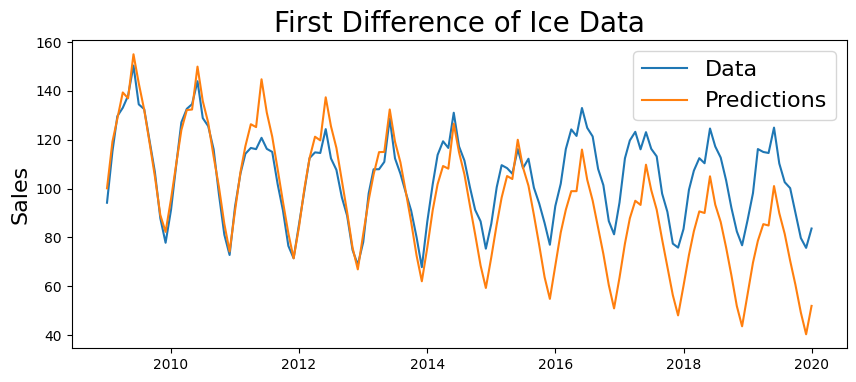

In [204]:
plt.figure(figsize=(10,4))
plt.plot(test_data)
plt.plot(predictions)
plt.legend(('Data', 'Predictions'), fontsize=16)
plt.title('First Difference of Ice Data', fontsize=20)
plt.ylabel('Sales', fontsize=16)

In [205]:
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 17.28254133636939


# Try RNN -> LSTMs 

In [220]:
df = (train_data['IPN31152N'].values).reshape(-1,1)

In [221]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
df=sc.fit_transform(df)

In [224]:
df.shape

(444, 1)

In [225]:
x_train =[]
y_train =[]
for i in range(12 , 444 ):
    x_train.append(df[i-12:i,0])
    y_train.append(df[i,0])

x_train=np.array(x_train)
y_train=np.array(y_train)

In [226]:
x_train= np.reshape(x_train,(x_train.shape[0],12,1))

In [227]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [263]:
regressor =Sequential()
regressor.add(LSTM(units=50 , return_sequences=True , input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50 , return_sequences=True ))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units=50 ))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam' , loss="mean_squared_error")

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [264]:
regressor.fit(x_train,y_train ,epochs=100 , batch_size=32)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 0.1359
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0362
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0330
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0313
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0286
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0274
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0259
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0226
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0231
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0213
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0200
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0222
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0188
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0176
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0161
Epoc

In [265]:
actual = (test_data['IPN31152N'].values).reshape(-1,1)

In [266]:
actual.shape

(133, 1)

In [267]:
total_data=pd.concat(( train_data['IPN31152N'] , test_data['IPN31152N'] ) , axis=0 )  
input = total_data[ len(total_data) - len(test_data) - 12 : ].values

input = input.reshape(-1,1)

input=sc.transform(input)

x_test =[]
for i in range( 12 , 145 ):
    x_test.append(input[ i-12 : i , : ])

x_test=np.array(x_test)
x_test=np.reshape(x_test , ( x_test.shape[0] , 12 , 1 ))

predicted=regressor(x_test)
predicted=sc.inverse_transform(predicted)

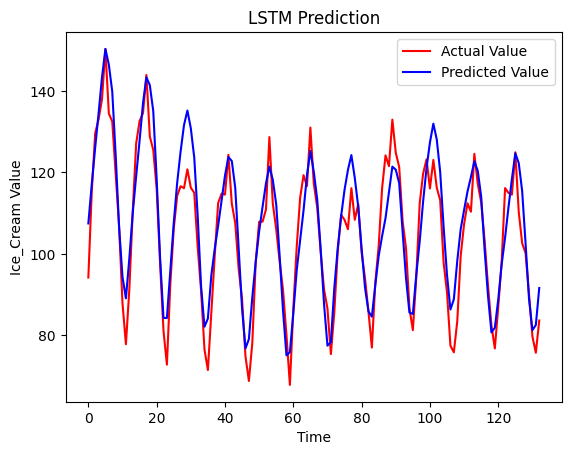

In [268]:
plt.plot(actual, color = 'red', label = 'Actual Value')
plt.plot(predicted, color = 'blue', label = 'Predicted Value')
plt.title('LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Ice_Cream Value')
plt.legend()
plt.show()

In [269]:
residuals = actual - predicted
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 7.057643459132559


# Try RNN -> GRU

In [270]:
from tensorflow.keras.layers import GRU

In [271]:
regressor = Sequential()
regressor.add(GRU(units=50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
regressor.add(Dropout(0.2))
regressor.add(GRU(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
regressor.add(GRU(units=50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units=1))
regressor.compile(optimizer='adam', loss='mean_squared_error')

C:\Users\Ahmed\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [272]:
regressor.fit(x_train,y_train ,epochs=100 , batch_size=32)

Epoch 1/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.1376
Epoch 2/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0374
Epoch 3/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0368
Epoch 4/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0318
Epoch 5/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0316
Epoch 6/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0280
Epoch 7/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0241
Epoch 8/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0189
Epoch 9/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0153
Epoch 10/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0109
Epoch 11/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0094
Epoch 12/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0077
Epoch 13/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0072
Epoch 14/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0077
Epoch 15/100
14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0083
Ep

In [273]:
predicted=regressor(x_test)
predicted=sc.inverse_transform(predicted)

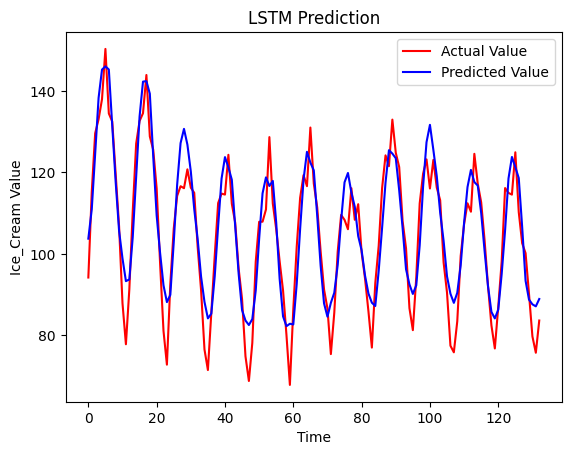

In [274]:
plt.plot(actual, color = 'red', label = 'Actual Value')
plt.plot(predicted, color = 'blue', label = 'Predicted Value')
plt.title('LSTM Prediction')
plt.xlabel('Time')
plt.ylabel('Ice_Cream Value')
plt.legend()
plt.show()

In [275]:
residuals = actual - predicted
print('Root Mean Squared Error:', np.sqrt(np.mean(residuals**2)))

Root Mean Squared Error: 6.963479059143207
